In [13]:
"""
Created on: Tue. 16 Aug. 2022
Updated on: Tue. 23 Aug. 2022
Updated on: Mon. 14 Nov. 2022
Author: Mélina Verger

Data visualization.
"""

# For data manipulation
import pandas as pd

# Plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

# To load the trained models
import pickle

# sns.set_theme(style="whitegrid")

## Load training sets only and variables

In [14]:
DATA = pickle.load(open("./data/DATA", "rb"))
SPLIT = pickle.load(open("./data/SPLIT", "rb"))

print(DATA)
print(SPLIT)

stInfo
7030


In [15]:
X_train = pd.read_csv("./data/X_train" + "_" + DATA + "_" + SPLIT + ".csv")
y_train = pd.read_csv("./data/y_train" + "_" + DATA + "_" + SPLIT + ".csv")

## Prepare visualization

In [16]:
df_viz = X_train.copy()
df_viz["final_result"] = y_train

In [17]:
color_palette_final_result = ["red", "blue"]
color_palette_gender = ["lightcoral", "mediumaquamarine"]

## Visualization

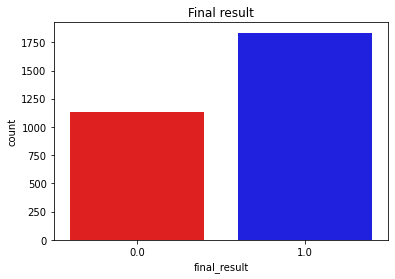

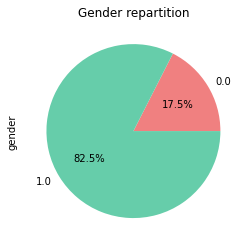

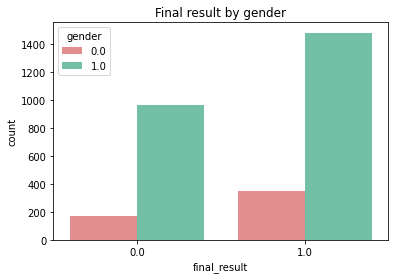

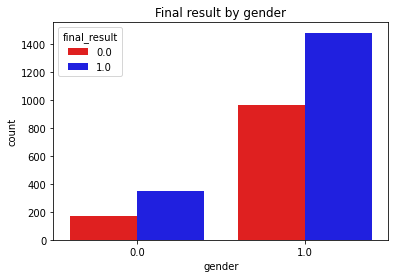

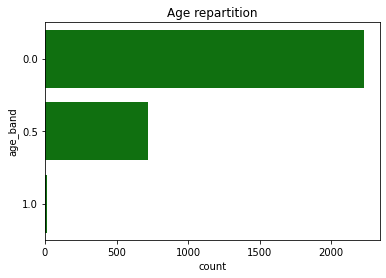

Age repartition
0.0    2229
0.5     721
1.0      15
Name: age_band, dtype: int64




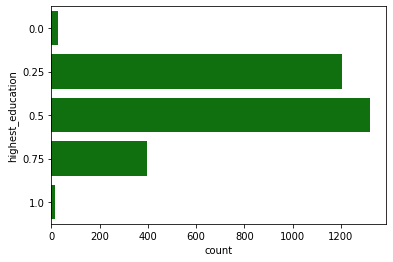

Highest education repartition
0.75     396
0.50    1322
0.25    1206
1.00      15
0.00      26
Name: highest_education, dtype: int64


Highest education by gender
   gender  highest_education  percentage
0     0.0                0.5        50.1
1     0.0                0.2        36.2
2     0.0                0.8        11.4
3     0.0                0.0         1.3
4     0.0                1.0         1.0
5     1.0                0.5        43.4
6     1.0                0.2        41.6
7     1.0                0.8        13.8
8     1.0                0.0         0.8
9     1.0                1.0         0.4


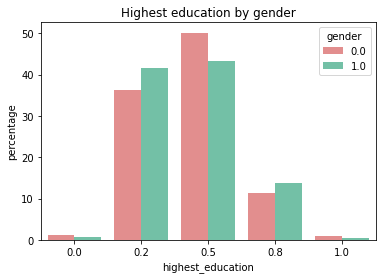

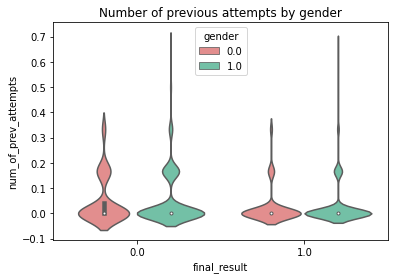

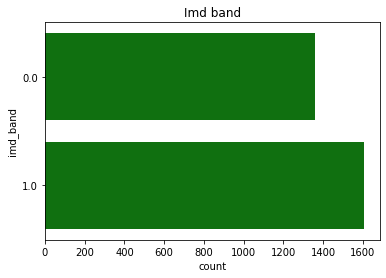

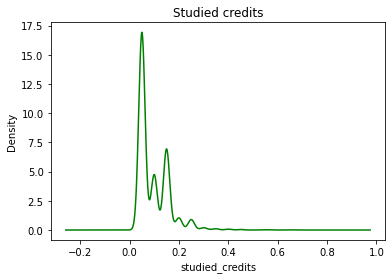

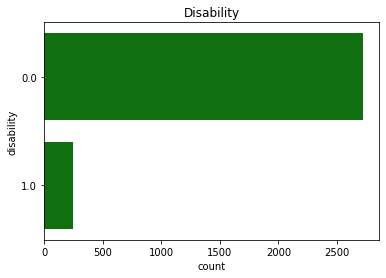

In [18]:
sns.countplot(x="final_result", data=df_viz, palette=color_palette_final_result)
plt.title("Final result")
plt.show()

if "gender" in X_train.columns:
    data = df_viz.groupby("gender")["gender"].count()
    fig, ax = plt.subplots(figsize = (10,4))
    data.plot.pie(autopct="%.1f%%", colors=color_palette_gender)
    fig.set_facecolor("white")
    plt.title("Gender repartition")
    plt.show()

    sns.countplot(hue="gender", x="final_result", data=df_viz, palette=color_palette_gender)
    plt.title("Final result by gender")
    plt.show()

    sns.countplot(x="gender",
              hue="final_result",
              data=df_viz,
              palette=color_palette_final_result)
    plt.title("Final result by gender")
    plt.show()

if "age_band" in X_train.columns:
    sns.countplot(y="age_band", data=df_viz, palette=["green"])
    plt.title("Age repartition")
    plt.show()

    print("Age repartition", flush=True)
    print(df_viz["age_band"].value_counts(), flush=True)
    print("\n", flush=True)

if "highest_education" in X_train.columns:
    sns.countplot(y="highest_education",
              data=df_viz,
              palette=["green"])
    plt.show()
    
    print("Highest education repartition", flush=True)
    print(df_viz["highest_education"].value_counts(sort=False), flush=True)
    print("\n", flush=True)

    print("Highest education by gender", flush=True)
    occupation_counts = (df_viz.groupby(["gender"])["highest_education"]
                     .value_counts(normalize=True)
                     .rename("percentage")
                     .mul(100)
                     .reset_index()
                     .sort_values("gender")
                     .round(decimals=1)
                     )
    print(occupation_counts, flush=True)

    sns.barplot(x="highest_education",
            y="percentage",
            hue="gender",
            data=occupation_counts,
            palette=color_palette_gender)
    plt.title("Highest education by gender")
    plt.show()

    sns.violinplot(x="final_result", 
               y="num_of_prev_attempts",
               hue="gender",
               data=df_viz,
               palette=color_palette_gender)
    plt.legend(loc='upper center', title = "gender")
    plt.title("Number of previous attempts by gender")
    plt.show()
    
if "imd_band" in X_train.columns:
    sns.countplot(y="imd_band",
              data=df_viz,
              palette=["green"])
    plt.title("Imd band")
    plt.show()

if "studied_credits" in X_train.columns:
    df_viz["studied_credits"].plot(kind="kde", color="green")
    plt.xlabel("studied_credits")
    plt.title("Studied credits")
    plt.show()

if "disability" in X_train.columns:
    sns.countplot(y="disability",
                data=df_viz,
                palette=["green"])
    plt.title("Disability")
    plt.show()

if "sum_click" in X_train.columns:
    df_viz["sum_click"].hist(color='green', bins=100)
    plt.title("Total number of click repartition")
    plt.show()